In [ ]:
from google.colab import auth
import gspread
from google.auth import default
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
#Authenticate User
auth.authenticate_user()
creds, _ = default()
gc = gspread.authorize(creds)

In [ ]:
worksheet = gc.open('StudentsData').sheet1
rows = worksheet.get_all_values()
df = pd.DataFrame(rows[1:], columns=rows[0])
df = df.astype({'Input':'float','Output':'float'})

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
df.head()

,,Input,Output
0,,1.0,11.0
1,,2.0,21.0
2,,3.0,31.0
3,,4.0,41.0
4,,5.0,51.0


In [ ]:
x=df[['Input']].values
y=df[['Output']].values

In [ ]:
x

array([[ 1.],
       [ 2.],
       [ 3.],
       [ 4.],
       [ 5.],
       [ 6.],
       [ 7.],
       [ 8.],
       [ 9.],
       [10.],
       [11.],
       [12.],
       [13.],
       [14.],
       [15.],
       [16.],
       [17.],
       [18.],
       [19.],
       [20.],
       [21.],
       [22.],
       [23.],
       [24.],
       [25.],
       [26.]])

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=11)

In [ ]:
Scaler=MinMaxScaler()

In [ ]:
Scaler.fit(x_train)
Scaler.fit(x_test)

MinMaxScaler()

In [ ]:
x_train1=Scaler.transform(x_train)

In [ ]:
x_test1=Scaler.transform(x_test)

In [ ]:
x_train1

array([[ 1.0625],
       [-0.0625],
       [ 0.0625],
       [ 1.125 ],
       [ 0.75  ],
       [-0.1875],
       [ 1.25  ],
       [ 1.3125],
       [ 1.1875],
       [ 0.9375],
       [ 0.25  ],
       [-0.125 ],
       [ 0.5625],
       [ 0.625 ],
       [ 0.875 ],
       [ 0.8125],
       [ 1.375 ]])

In [ ]:
ai_brain = Sequential([
    Dense(6,activation='relu'),
    Dense(4,activation='relu'),
    Dense(1)
])

In [ ]:
ai_brain.compile(
    optimizer='rmsprop',
    loss='mse'
)

In [ ]:
ai_brain.fit(x_train1,y_train,epochs=4000)

Streaming output truncated to the last 5000 lines.
1/1 [==============================] - 0s 20ms/step - loss: 17794.1758
Epoch 1502/4000
1/1 [==============================] - 0s 13ms/step - loss: 17776.0137
Epoch 1503/4000
1/1 [==============================] - 0s 12ms/step - loss: 17757.8418
Epoch 1504/4000
1/1 [==============================] - 0s 11ms/step - loss: 17739.6602
Epoch 1505/4000
1/1 [==============================] - 0s 16ms/step - loss: 17721.4668
Epoch 1506/4000
1/1 [==============================] - 0s 17ms/step - loss: 17703.2656
Epoch 1507/4000
1/1 [==============================] - 0s 12ms/step - loss: 17685.0566
Epoch 1508/4000
1/1 [==============================] - 0s 11ms/step - loss: 17666.8398
Epoch 1509/4000
1/1 [==============================] - 0s 21ms/step - loss: 17648.6113
Epoch 1510/4000
1/1 [==============================] - 0s 10ms/step - loss: 17630.3750
Epoch 1511/4000
1/1 [==============================] - 0s 12ms/step - loss: 17612.1289
Epoch 15

In [ ]:
loss_df=pd.DataFrame(ai_brain.history.history)

Text(0.5, 1.0, 'Training Loss Vs Iteration Plot')

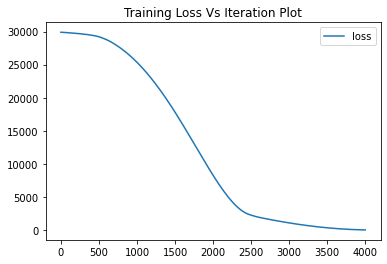

In [ ]:
loss_df.plot()
plt.title('Training Loss Vs Iteration Plot')

In [ ]:
ai_brain.evaluate(x_test1,y_test)

1/1 [==============================] - 0s 131ms/step - loss: 13.2990


13.298980712890625

In [ ]:
x_n1=[[66]]

In [ ]:
x_n1_1=Scaler.transform(x_n1)

In [ ]:
ai_brain.predict(x_n1_1)

array([[644.0556]], dtype=float32)